## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

<ul>1. Работа с данными:

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков 

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)
  </ul>


<ul>2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.) 

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки</ul>


<ul>3. Построить линейные регрессионные модели для каждого выбранной комбинации признаков :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1) на НЕ стандартизированных  данных
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3) на НЕ стандартизированных данных
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7) на НЕ стандартизированных данных</ul>

<ul>4. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)</ul>
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Выбран кодовый формат
```

### АВТ-918 ЛР№1 Ванин К.Е. и Соловьев Н.Е. 

In [ ]:
# Python 3.8
import pandas as pd #обработка (загрузка, сохранение, анализа) данных
import numpy  as np #обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа

from sklearn import linear_model # (классификация, регрессия, кластеризация...)
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

import scipy #пакет для выполнения научных и инженерных расчётов.
import seaborn as sns #визуализация данных (на базе matplotlib)

In [ ]:
def plotTableNA(DataFrame, addToTilte =""):
    '''Функция для построения графика отображение отсутсвующих значений'''
    if   len(DataFrame.columns)> 20:   K = 3
    elif len(DataFrame.columns)== 1:   K = 1
    else:                          K = 1.7 
        
    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(DataFrame.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра 
    plt.imshow( DataFrame.isna(),
                cmap = ListedColormap([ '#6031AB', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(DataFrame.columns)))
    ax.set_xticklabels(DataFrame.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)

### Результаты первичного анализа исходных данных
  1. Количество записей и признаков
  2. Смысловое описание признаков
  3. Типы данных столбцов и информация о пропусках
  4. Результат замены категориальных или ранговых данных на числовые
  5. Результат обработки пропущенных значений

In [ ]:
DataFrame=pd.read_csv('sample_data/insurance_nan.csv',sep=',',header=0)

print("Размер до удаление пропусков",DataFrame.shape)
print("Количество записей {} \t Количестов признаов {}".format( DataFrame.shape[0], DataFrame.shape[1]))
str="""sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance"""
print(str)


Размер до удаление пропусков (1338, 7)
Количество записей 1338 	 Количестов признаов 7
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance


Типы данных столбцов и информация о пропусках

In [ ]:
DataFrame.isnull ().sum()

age         10
sex          5
bmi          6
children     5
smoker       5
region       7
charges     12
dtype: int64

In [ ]:

DataFrame=DataFrame.dropna(axis='index',how='any')
print("Размер таблицы после исключения пропусков", DataFrame.shape)


Размер таблицы после исключения пропусков (1289, 7)


Результат обработки пропущенных значений.

Результат замены категориальных или ранговых данных на числовые.

In [ ]:
DataFrame.describe(include=['object', 'bool'])  # описание для не числовых значений
ObjectColumnNames = [ 'sex','smoker','region'] # названия признаков в исходной таблицы
prefixColumnNames =  ['sex','smoker','reg']   # сокращенные названия признаков для новой таблицы

DataFrame_dummies = pd.get_dummies(
    DataFrame[ObjectColumnNames], # названия признаков в исходной 
    prefix=prefixColumnNames  # сокращенные названия в новой
)

digitColumnNames=['age','bmi','children','charges']
DataFrame_digitPlus  = pd.concat(
                        [
                          DataFrame[digitColumnNames],   
                          DataFrame_dummies     
                        ], # список объединяемых объектов

                        axis='columns' # способ объединения - по столбцам 
)
DataFrame_digitPlus[:8]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0
5,31.0,25.740,0.0,3756.62160,1,0,1,0,0,0,1,0
6,46.0,33.440,1.0,8240.58960,1,0,1,0,0,0,1,0
7,37.0,27.740,3.0,7281.50560,1,0,1,0,0,1,0,0


Перечень вариантов целевых переменных

In [ ]:
corr_DataFrame = DataFrame_digitPlus.corr(method='pearson')
corr_DataFrame["charges"]
# Последовательное применение операции: 
# - получить единственный столбец, 
# - получить абсолютные значения, 
# - отсортировать
corr_DataFrame[['charges']].abs().sort_values(by="charges")

,charges
reg_northeast,0.001289
reg_southwest,0.038318
reg_northwest,0.038368
sex_female,0.056730
sex_male,0.056730
children,0.067020
reg_southeast,0.072479
bmi,0.201039
age,0.304564
smoker_no,0.790357


Матрица коэффициентов корреляции

<ipython-input-44-70d39323217c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_DataFrame, dtype=np.bool)


Text(0.5, 1.0, 'Матрица корреляции признаков')

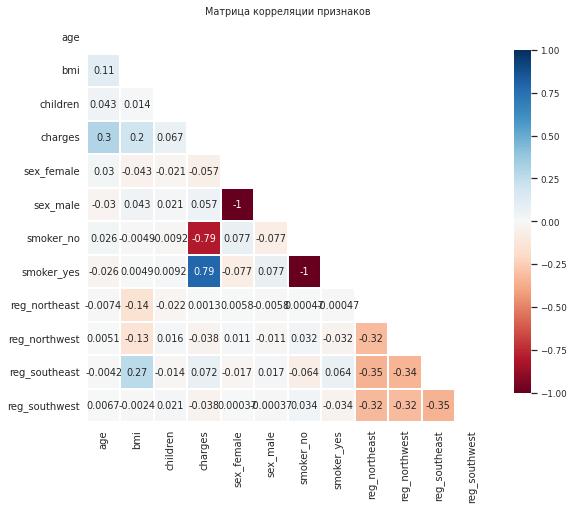

In [ ]:
sns.set_style(style="white")# цвет фона
# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_DataFrame, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.8) # размер шрифта
# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_DataFrame,   ### <<<- объект-матрица корреляции 
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков')

Матрица смежности (графический вариант интерпретации взаимосвязей переменных)

Text(0.5, 1.0, 'Матрица смежности')

<Figure size 504x504 with 0 Axes>

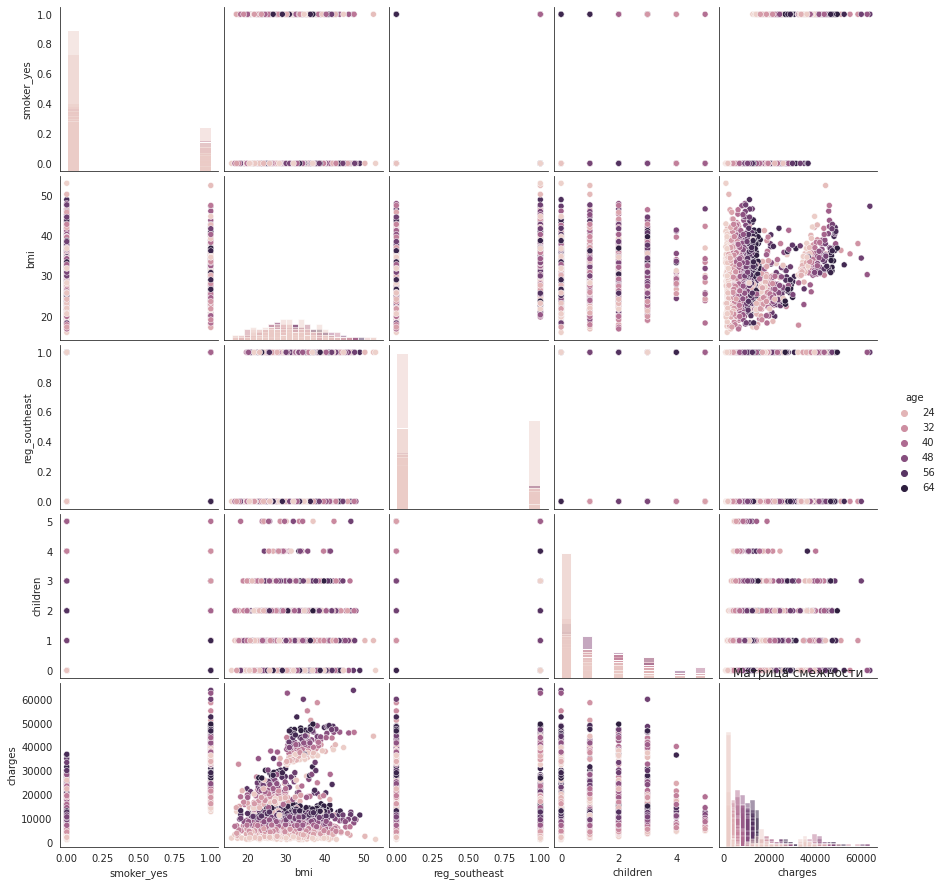

In [ ]:
target=['charges']
features=['smoker_yes','age','bmi','reg_southeast','children']
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков
sns.pairplot(DataFrame_digitPlus[features + target], hue="age",diag_kind = 'hist') 
plt.title('Матрица смежности')

Информация о целевом значении и признаках на него влияющих

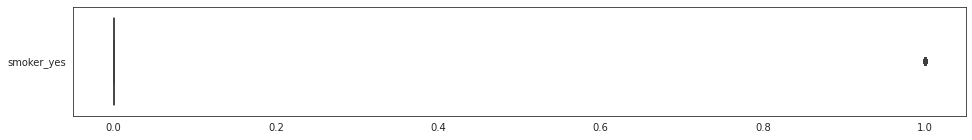

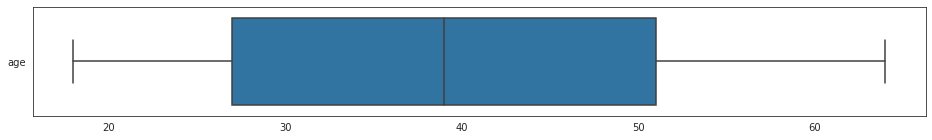

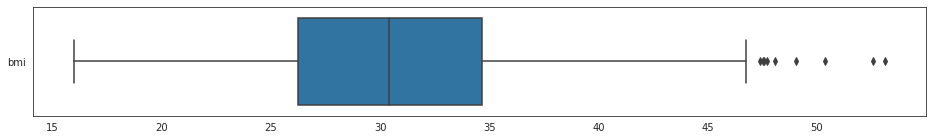

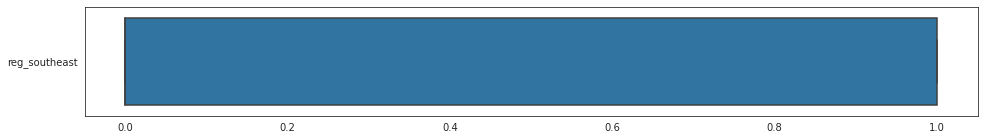

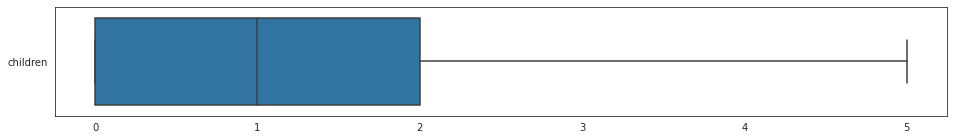

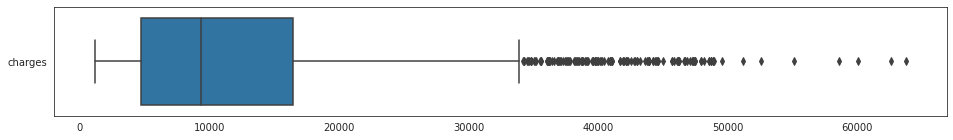

In [ ]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=DataFrame_digitPlus[[feature_name]],orient='h')

Результат отчистки выбранных признаков исходного массива от выбросов

bmi. Принимаем пороговые значение равными (16, 48).
  Кол-во эл. вне пороговых - 1 из 1289 значение(ий) (0.1%)

age. Принимаем пороговые значение равными (15, 65).
  Кол-во эл. вне пороговых - 0 из 1289 значение(ий) (0.0%)

children. Принимаем пороговые значение равными (0, 5).
  Кол-во эл. вне пороговых - 0 из 1289 значение(ий) (0.0%)

charges. Принимаем пороговые значение равными (2000, 40000).
  Кол-во эл. вне пороговых - 88 из 1289 значение(ий) (6.8%)

Обработан  bmi
Обработан  age
Обработан  children
Обработан  charges
Отброшено 169 строк. Осталось 1120 строк.
smoker_yes 0 1
age 18.0 64.0
bmi 16.815 47.74
reg_southeast 0 1
children 0.0 5.0
charges 2007.945 39983.42595


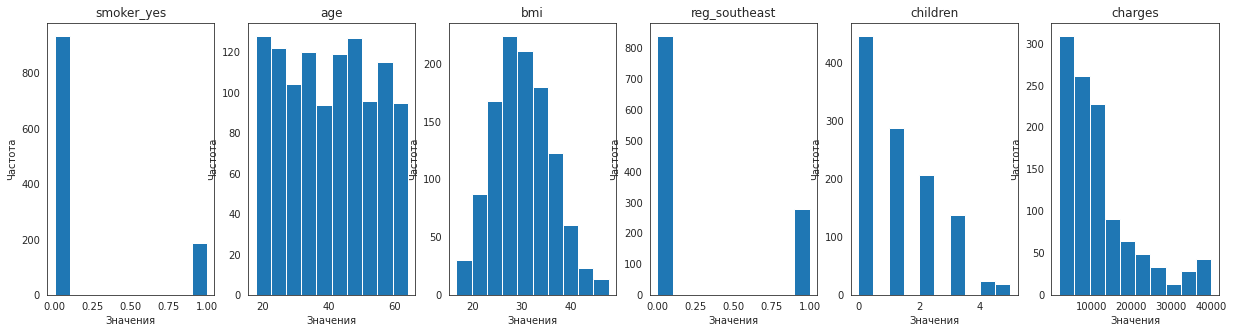

In [ ]:
borders={
        'bmi':(16,48),
        'age':(15,65),
        'children':(0,5),
        'charges':(2*10**3,40*10**3),
    }
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in borders:
    bordersMin =  borders[feature_name][0] # извлечь нижнее пороговое
    bordersMax =  borders[feature_name][1] # извлечь верхнее пороговое
    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len( DataFrame_digitPlus[  ~(DataFrame_digitPlus[feature_name] >= bordersMin ) & (DataFrame_digitPlus[feature_name] <= bordersMax) ] )
    dcount = DataFrame_digitPlus[feature_name].count() # кол-во эл. общее
    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format( 
        feature_name, 
        borders[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

    # Во избежание путаницы создадим для полседующих операций копию исходного объетка
DataFrame_digitPlusFiltred = DataFrame_digitPlus.copy()
for feature_name  in borders:
    threesMin =  borders[feature_name][0]
    tresshMax =  borders[feature_name][1]
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    DataFrame_digitPlusFiltred = DataFrame_digitPlusFiltred[ 
        (DataFrame_digitPlusFiltred[feature_name] >= threesMin ) & (DataFrame_digitPlusFiltred[feature_name] <= tresshMax)]
    print("Обработан ", feature_name )
    
    
print ("Отброшено {} строк. Осталось {} строк.".format(
    len(DataFrame_digitPlus)  - len(DataFrame_digitPlusFiltred),
    len(DataFrame_digitPlusFiltred))
)

# Строим гистограммы по каждому признаку: 
plt.figure(figsize=(21, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1
    
    plt.subplot(1, len(features+target), plot_number)
    
    plt.hist(DataFrame_digitPlusFiltred[feature_name]) # Построение гистрограммы
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name, 
           DataFrame_digitPlusFiltred[feature_name].min(),
           DataFrame_digitPlusFiltred[feature_name].max())

In [ ]:
#Сохранение данных
DataFrame_digitPlusFiltred.to_csv('sample_data/insurance_data_Ready.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

Результаты анализа полученных регрессионных линейных моделей (m11,m12,m21,m22)

### Одномерная модель

In [ ]:
#Одномерная модель
target=['charges']
features=['smoker_yes','age','bmi','reg_southeast','children']
x_train, x_test, y_train, y_test =  train_test_split(
    DataFrame_digitPlusFiltred[features],    # исходные данные X
    DataFrame_digitPlusFiltred[target],      # исходные данные y
    test_size = 0.3, random_state=5, shuffle=True) 
#x_test[:10]
#y_test[:10]


Уравнение линейной регрессии вида

График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)

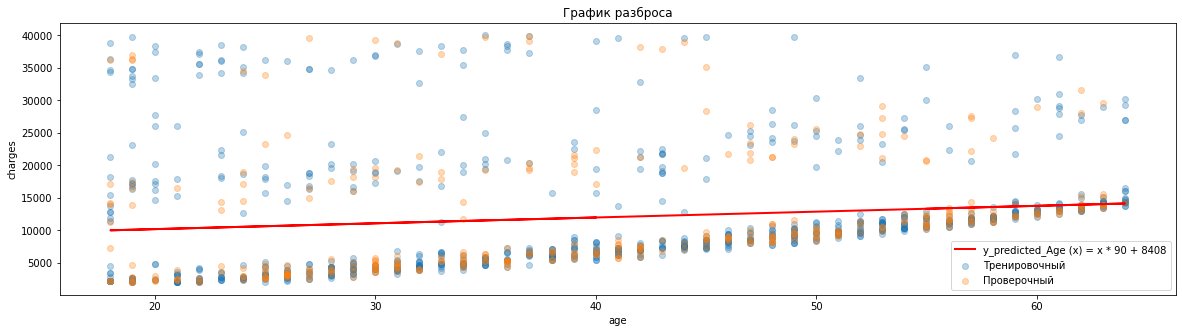

In [ ]:

lr1 = linear_model.LinearRegression()
# Вычислить коэфф. Ki в функции y(x)=Ki*xi+...+B, на тренировочном наборе, т.е. обучить модель
lin_model_Age = lr1.fit(x_train[['age']], y_train[['charges']])
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_ChargesAge  = lin_model_Age.predict(x_test[['age']])

#построим график рассеяния (он же график разброса, точечный, scatter)
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(20,5))
# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['age']],  y_train[['charges']], alpha=0.3, label='Тренировочный') # тренировочный
plt.scatter(x_test[['age']],   y_test[['charges']],  alpha=0.3, label='Проверочный')   # проверочный
# Нанести график - линии через точки - plt.plot
label_str = "y_predicted_Age (x) = x * {:.0f} + {:.0f}".format(lin_model_Age.coef_[0][0], lin_model_Age.intercept_[0])
plt.plot( x_test[['age']], y_pred_ChargesAge, lw=2, color='red', label=label_str)
plt.legend(loc="best")  # положение легенды
plt.xlabel('age') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

Гистограмма остатков (разностей между Y_pred и Y_test)

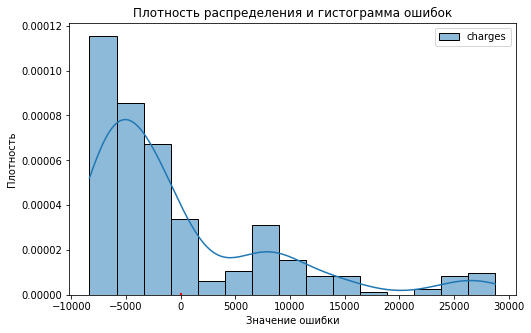

In [ ]:

# построим гистограмму распределения ошибок
plt.figure(figsize=(8,5))
# Гистограмма и Плотность распределения
sns.histplot(y_test[['charges']] - y_pred_ChargesAge, color="red",  kde=True, stat="density",)
# Осевая линия
plt.plot( [0, 0], [0, 10 * pow(10,-7)], '--', lw=2, c='r')
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок')
plt.show()

Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test

Оценка точности R2 и RMSE

Линейная одномерная регрессия. Признак 'Age'.
y_pred_ChargesAge (x) = x * [[89.57548081]] + [8408.30297351]

R2 - коэфф. детерминации:          0.046
MAE - средняя абсолютная ошибка: 6,573.957
RMSE - кв. корень из среднеквадратичной ошибки: 8,599.186


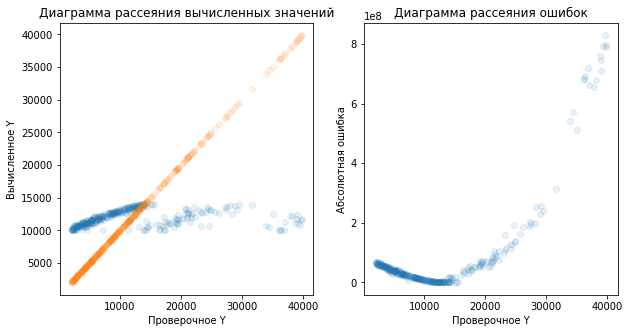

In [ ]:
#Построим графики для визуальной оценки качества модели
plt.figure(figsize=(10,5))
# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['charges']], y_pred_ChargesAge,  alpha=0.1)
plt.scatter(y_test[['charges']], y_test[['charges']],  alpha=0.1)#красная линия
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['charges']], (y_test[['charges']] - y_pred_ChargesAge)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

#сравним реальные и вычисленные значениямя и получим важные оценки качества модели
print ("Линейная одномерная регрессия. Признак 'Age'.")
print ("y_pred_ChargesAge (x) = x * {} + {}\n".format(lin_model_Age.coef_, lin_model_Age.intercept_))

r2_LinRegr_Age   = metrics.r2_score                   (y_test[['charges']], y_pred_ChargesAge)
mae_LinRegr_Age  = metrics.mean_absolute_error        (y_test[['charges']], y_pred_ChargesAge)
rmse_LinRegr_Age = np.sqrt( metrics.mean_squared_error(y_test[['charges']], y_pred_ChargesAge))

print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_Age ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_Age ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_Age )) 
#Среднеквадратическая ошибка – это сумма квадратов разностей между предсказаниями и истинными значениями, деленная на количество выборок.


### Многомерная модель первого набора

График сравнения вычесленных данных по сравнению с выборочными

Text(0.5, 1.0, 'Проверочное Vs Вычисленное(K-Fold)')

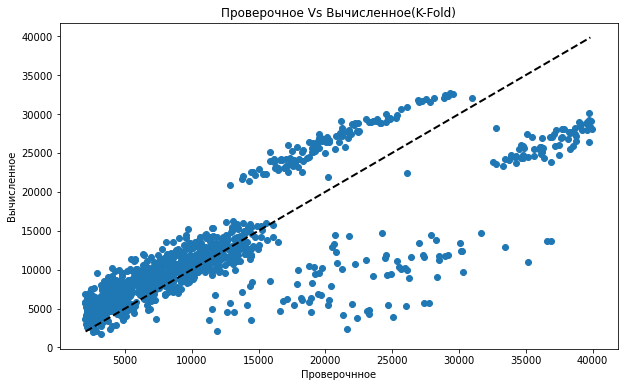

In [ ]:
#многомерная модель
features=['age','bmi','smoker_yes']
x_train, x_test, y_train, y_test =  train_test_split(
    DataFrame_digitPlusFiltred[features],    # исходные данные X
    DataFrame_digitPlusFiltred['charges'],      # исходные данные y
    test_size = 0.3, random_state=5, shuffle=True) 
    
lr2 = linear_model.LinearRegression()
# Вычислить коэфф. Ki в функции y(x)=Ki*xi+...+B, на тренировочном наборе, т.е. обучить модель
lin_model_lr2 = lr2.fit(x_train, y_train)
# Получить вычисленные(predicted) зн. на проверочном наборе
y_predicted_lr2 = lin_model_lr2.predict(x_test)

predicted=cross_val_predict(lin_model_lr2,DataFrame_digitPlusFiltred[features], DataFrame_digitPlusFiltred['charges'],cv=6)
plt.figure(figsize=(10,6))
plt.scatter(DataFrame_digitPlusFiltred['charges'],predicted)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Проверочнное')
plt.ylabel('Вычисленное')
plt.title(u'Проверочное Vs Вычисленное(K-Fold)')


Уравнение линейной регрессии вида

График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)

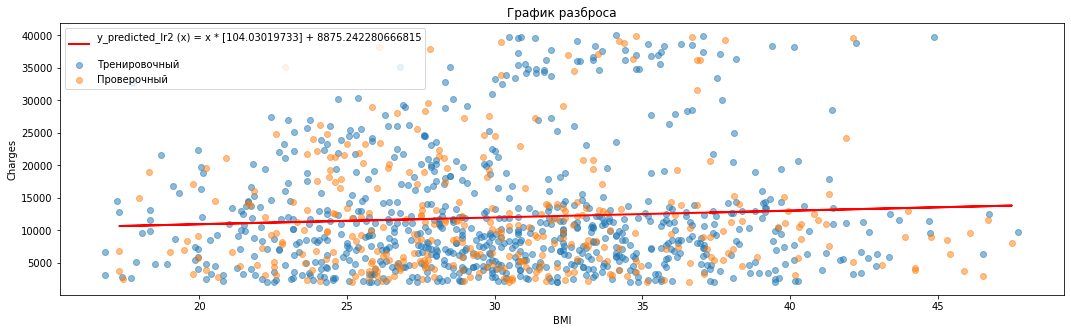

In [ ]:
#Для наглядности построим график рассеяния (он же график разброса, точечный, scatter)
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(18,5))
lin_model_BMI = lr2.fit(x_train[['bmi']], y_train)
y_predicted_BMI=lin_model_BMI.predict(x_test[['bmi']])
# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['bmi']],  y_train, alpha=0.5, label='Тренировочный') # тренировочный
plt.scatter(x_test[['bmi']],   y_test,  alpha=0.5, label='Проверочный')   # проверочный
# Нанести график - линии через точки - plt.plot
label_str = "y_predicted_lr2 (x) = x * {} + {}\n".format(lin_model_BMI.coef_, lin_model_BMI.intercept_)
plt.plot( x_test[['bmi']], lr2.predict(x_test[['bmi']]),lw=2, color='red', label=label_str)
plt.legend(loc="best")  # положение легенды
plt.xlabel('BMI') # подпись осей
plt.ylabel('Charges')   # подпись осей
plt.title(u'График разброса'); # Заголовок

Гистограмму остатков (разностей между Y_pred и Y_test)

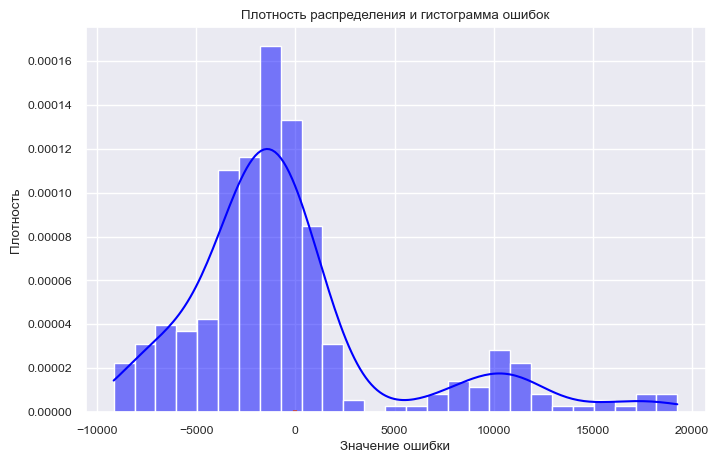

In [ ]:
#Для оценки точности построим гистограмму распределения ошибок
plt.figure(figsize=(8,5))
# Гистограмма и Плотность распределения
sns.histplot(y_test - y_predicted_lr2, color="blue",  kde=True, stat="density",)
# Осевая линия
plt.plot( [0, 0], [0, 10 * pow(10,-7)], '--', lw=3, c='r')
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок')
plt.show()

Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test

Оценка точности R2 и RMSE

Линейная одномерная регрессия. Признак 'BMI'.
y_predicted_BMI (x) = x * [104.03019733] + 8875.242280666815

Cравним реальные и вычисленные значениямя и получим важные оценки качества модели
R2 - коэфф. детерминации:          0.621
MAE - средняя абсолютная ошибка: 3,775.295
RMSE - кв. корень из среднеквадратичной ошибки: 5,423.168


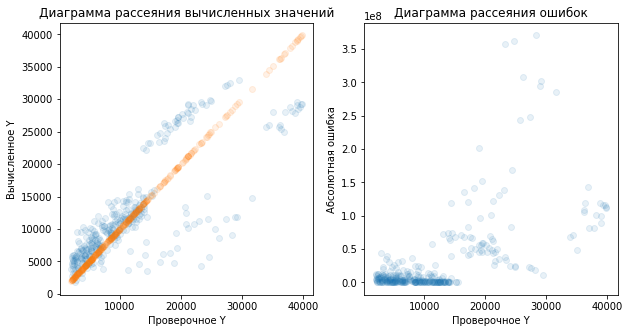

In [ ]:

#Построим графики для визуальной оценки качества модели
plt.figure(figsize=(10,5))
# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_predicted_lr2,  alpha=0.1)
plt.scatter(y_test, y_test,  alpha=0.1)#красная линия
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')
# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test, (y_test - y_predicted_lr2)**2,  alpha=0.1)
plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

#сравним реальные и вычисленные значениямя и получим важные оценки качества модели
print ("Линейная одномерная регрессия. Признак 'BMI'.")
print ("y_predicted_BMI (x) = x * {} + {}\n".format(lin_model_BMI.coef_, lin_model_BMI.intercept_))

print ("Cравним реальные и вычисленные значениямя и получим важные оценки качества модели")
r2_LinRegr_lr2   = metrics.r2_score                   (y_test, y_predicted_lr2)
mae_LinRegr_lr2  = metrics.mean_absolute_error        (y_test, y_predicted_lr2)
rmse_LinRegr_lr2 = np.sqrt( metrics.mean_squared_error(y_test, y_predicted_lr2))

print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_lr2 ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_lr2 ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_lr2 ))

### Многомерная модель второго набора

График сравнения вычесленных данных по сравнению с выборочными

Text(0.5, 1.0, 'Проверочное Vs Вычисленное(K-Fold)')

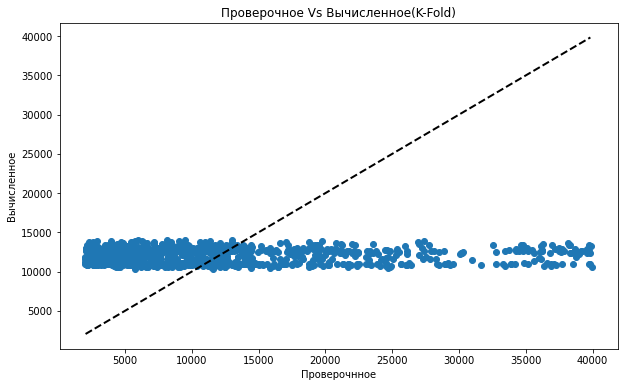

In [ ]:
features=['children','reg_southeast','sex_female']
x_train, x_test, y_train, y_test =  train_test_split(
    DataFrame_digitPlusFiltred[features],    # исходные данные X
    DataFrame_digitPlusFiltred['charges'],      # исходные данные y
    test_size = 0.3, random_state=5, shuffle=True) 

lr3 = linear_model.LinearRegression()
# Вычислить коэфф. Ki в функции y(x)=Ki*xi+...+B, на тренировочном наборе, т.е. обучить модель
lin_model_lr3 = lr3.fit(x_train, y_train)
# Получить вычисленные(predicted) зн. на проверочном наборе
y_predicted_lr3 = lin_model_lr3.predict(x_test)

#построим точечный график сравнения вычисленных данных и проверочных
predicted=cross_val_predict(lin_model_lr2,DataFrame_digitPlusFiltred[features], DataFrame_digitPlusFiltred['charges'],cv=10)
plt.figure(figsize=(10,6))
plt.scatter(DataFrame_digitPlusFiltred['charges'],predicted)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Проверочнное')
plt.ylabel('Вычисленное')
plt.title(u'Проверочное Vs Вычисленное(K-Fold)')

Уравнение линейной регрессии вида

График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)

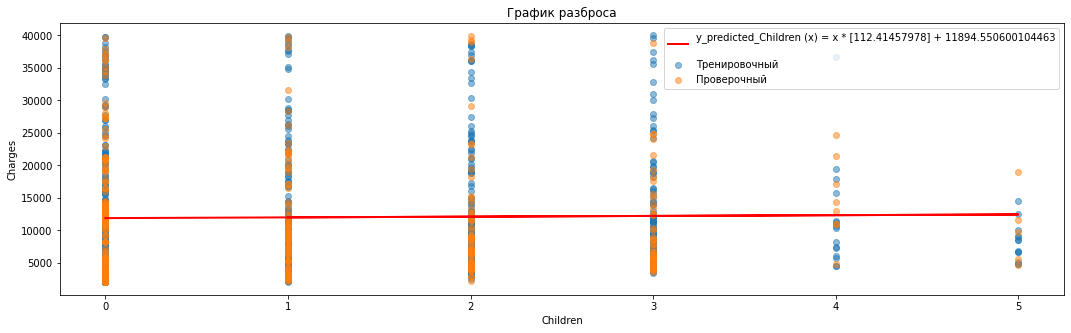

In [ ]:
#Для наглядности построим график рассеяния (он же график разброса, точечный, scatter)
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(18,5))
lin_model_Children = lr3.fit(x_train[['children']], y_train)
y_predicted_Children=lin_model_Children.predict(x_test[['children']])

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['children']],  y_train, alpha=0.5, label='Тренировочный') # тренировочный
plt.scatter(x_test[['children']],   y_test,  alpha=0.5, label='Проверочный')   # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_predicted_Children (x) = x * {} + {}\n".format(lin_model_Children.coef_, lin_model_Children.intercept_)
plt.plot( x_test[['children']], lr3.predict(x_test[['children']]),lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('Children') # подпись осей
plt.ylabel('Charges')   # подпись осей
plt.title(u'График разброса'); # Заголовок


Гистограмму остатков (разностей между Y_pred и Y_test)

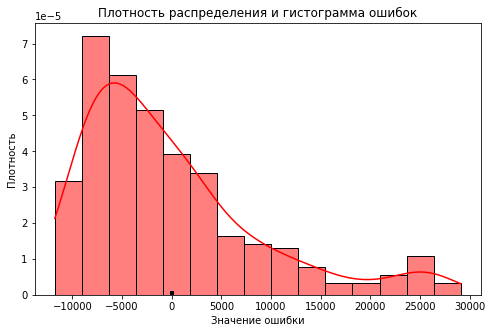

In [ ]:
#Для оценки точности построим гистограмму распределения ошибок
plt.figure(figsize=(8,5))
# Гистограмма и Плотность распределения
sns.histplot(y_test - y_predicted_lr3, color="red",  kde=True, stat="density",)
# Осевая линия
plt.plot( [0, 0], [0, 10 * pow(10,-7)], 'k--', lw=4)
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок')
plt.show()

Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test

Оценка точности R2 и RMSE

Линейная одномерная регрессия. Признак 'Children'.
y_predicted_Children (x) = x * [112.41457978] + 11894.550600104463

Cравним реальные и вычисленные значениямя и получим важные оценки качества модели
R2 - коэфф. детерминации:         -0.012
MAE - средняя абсолютная ошибка: 6,812.149
RMSE - кв. корень из среднеквадратичной ошибки: 8,858.715


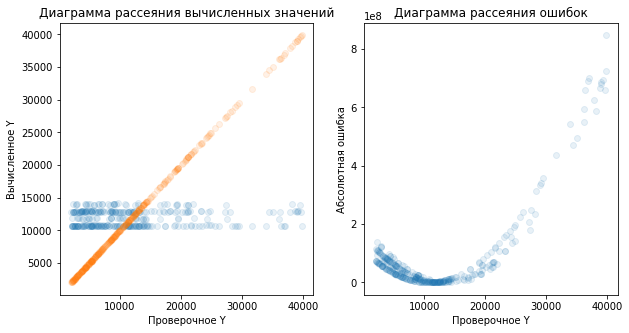

In [ ]:
#Построим графики для визуальной оценки качества модели
plt.figure(figsize=(10,5))
# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_predicted_lr3,  alpha=0.1)
plt.scatter(y_test, y_test,  alpha=0.1)#красная линия
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')
# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test, (y_test - y_predicted_lr3)**2,  alpha=0.1)
plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

#сравним реальные и вычисленные значениямя и получим важные оценки качества модели
print ("Линейная одномерная регрессия. Признак 'Children'.")
print ("y_predicted_Children (x) = x * {} + {}\n".format(lin_model_Children.coef_, lin_model_Children.intercept_))

print ("Cравним реальные и вычисленные значениямя и получим важные оценки качества модели")
r2_LinRegr_lr3   = metrics.r2_score                   (y_test, y_predicted_lr3)
mae_LinRegr_lr3  = metrics.mean_absolute_error        (y_test, y_predicted_lr3)
rmse_LinRegr_lr3 = np.sqrt( metrics.mean_squared_error(y_test, y_predicted_lr3))

print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_lr3 ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_lr3 ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_lr3 ))


### Выводы по результатам сравнительного анализа полученных регрессионных моделей 

  В ходе выполнения данной лабораторной была произведена работа с данными, а именно: получение исходных данных, анализ, обработка и последующее сохранение их для дальнейшей работы. Для создание нескольких моделей была выбрана целевая переменная  и независимые признаки, оказывающие на неё влияние, исключены выбросы и сформированы тренировочные и проверочные выборки. 

Для начала была построена и проверена линейная регрессионная модель на основе одного признака. Построены: линейный график зависимости, гистограмма ошибок и диаграмма рассеяния. На основе полученный вычисленных данных была получена оценка точности  R2 и RMSE, дабы показать состоятельность модели.
После были проведены построения многомерных моделей  на нескольких признаков для выявления их влияния на ключевой показатель. Построены те же графики для анализа, и просчитаны оценки точности. 

По данным оценкам точности можно смело сказать, что большее влияние на целевую переменную оказывает набор признаков под номером один. Это можно проследить не только по оценкам точности, но и по представленным точечным график и гистограмме ошибок.  


In [ ]:
ddf = pd.DataFrame (
    {
        "Признак": ["Age", "age,bmi,smoker_yes", "children,reg_southeast,sex_female"],
        "K":       [89.57,     104,     112], 
        "B":       [-8408,     8875,     11894],
        "MAE":     [6573,     3775,     6812],
        "RMSE":    [8599,     5423,     8858],
        "R2":      [0.046,      0.621,     0.001],
    }
 )
ddf


,Признак,K,B,MAE,RMSE,R2
0,Age,89.57,-8408,6573,8599,0.046
1,"age,bmi,smoker_yes",104.00,8875,3775,5423,0.621
2,"children,reg_southeast,sex_female",112.00,11894,6812,8858,0.001
